#### 1. 관서명, 살인발생, ... <= 컬럼명

  | 관서명 | 살인발생 | 살인검거 |
  | ------ | ------| ------ |
  | 중부  |    2 |  2   |
 
#### 2. 관서명(구분)이 인덱스, 살인발생, ... 컬럼명 

   |살인발생|살인검거|
   | ------| ------ |
   |    2   |  2     |

## 위의 형태로 Datafram이 나오게끔 
### 2017년 csv를 읽어서 위의 형태로 구성하시오 

In [1]:
import pandas as pd
import numpy as np

## 데이터 확득하기 
[5대범죄현황](https://www.data.go.kr/dataset/3075835/fileData.do)
폴더 이름을 seoul_crime 로 변경한 후 data 폴더에 저장
### pandas를 이용해 데이터를 정리
다운받은 파일을 변수에 저장한다.

In [2]:
# 한글명 제거 후 로드
# pd.read_csv('../data/seoul_crime/2017.csv', encoding='euc-kr')
# engine 옵션이 c, python으로 나눠져서 파싱을 하게 되는데 
# 기본값이 c엔진이라 한글이 깨지는 경우가 있음
# python 엔진으로 설정하면 파일명 및 파일 내용의 인코딩까지 자동으로 처리
crime_raw_data = pd.read_csv('../data/seoul_crime/2017년.csv', engine='python')
crime_raw_data.shape

(310, 4)

In [3]:
crime_raw_data.head()

구분  죄종 발생검거   건수
0  중부  살인   발생    0
1  중부  살인   검거    0
2  중부  강도   발생    6
3  중부  강도   검거    6
4  중부  강간   발생  173

- numpy 

    배열은 동일한 타입의 값들을 가지며, 
    배열의 차원을 rank 라 하고, 
    각 차원의 크기를 튜플로 표시하는 것을 shape 라 한다. 
    예를 들어, 행이 2이고 열이 3인 2차원 배열에서 rank는 2 이고,
     shape는 (2, 3) 이 된다.
     
 #### 총관할서의 수 = crime_raw_data.shape[0] / 10 => 31


In [5]:
# 5대 범죄 *2(발생, 검거) => 관할서당 데이터는 10개 
crime_raw_data.shape[0]/10

31.0

In [6]:
# 그러므로 데이터 구조의 데이터 수는 (31,10) 이런 형태로 출력되면 OK
tmp = pd.pivot_table( crime_raw_data,
                     index = ['구분'],
                     columns = ['죄종','발생검거']
                    )
tmp.shape

(31, 10)

In [7]:
tmp.head(2)

건수                                          
죄종     강간       강도     살인      절도          폭력      
발생검거   검거   발생  검거  발생 검거 발생   검거    발생    검거    발생
구분                                                 
강남    366  456  16  13  6  6  787  2069  1942  2229
강동    169  172  12  10  6  5  949  1645  2109  2429

In [9]:
tmp.columns

MultiIndex([('건수', '강간', '검거'),
            ('건수', '강간', '발생'),
            ('건수', '강도', '검거'),
            ('건수', '강도', '발생'),
            ('건수', '살인', '검거'),
            ('건수', '살인', '발생'),
            ('건수', '절도', '검거'),
            ('건수', '절도', '발생'),
            ('건수', '폭력', '검거'),
            ('건수', '폭력', '발생')],
           names=[None, '죄종', '발생검거'])

In [10]:
tmp.columns.levels[0]

Index(['건수'], dtype='object')

In [11]:
tmp.columns.levels[1]

Index(['강간', '강도', '살인', '절도', '폭력'], dtype='object', name='죄종')

In [9]:
tmp.columns.levels[2]

Index(['검거', '발생'], dtype='object', name='발생검거')

In [12]:
# 새로 규정된 컬럼명 생성하기 
# 리스트 컴프리헨션
new_cols =[ fStr + bStr
          for fStr in tmp.columns.levels[1]
          for bStr in tmp.columns.levels[2]
          ]
new_cols

['강간검거',
 '강간발생',
 '강도검거',
 '강도발생',
 '살인검거',
 '살인발생',
 '절도검거',
 '절도발생',
 '폭력검거',
 '폭력발생']

In [13]:
# 전체 컬럼명을 변경하는 방법을 덮어버려라(순서주의)
# 아 이런 방법도 되는구나 .... ㅇ.ㅇ 
tmp.columns = new_cols

In [16]:
tmp.columns

Index(['강간검거', '강간발생', '강도검거', '강도발생', '살인검거', '살인발생', '절도검거', '절도발생', '폭력검거',
       '폭력발생'],
      dtype='object')

In [17]:
tmp.head(2)

강간검거  강간발생  강도검거  강도발생  살인검거  살인발생  절도검거  절도발생  폭력검거  폭력발생
구분                                                            
강남   366   456    16    13     6     6   787  2069  1942  2229
강동   169   172    12    10     6     5   949  1645  2109  2429

In [18]:
crime_data = tmp[:]

In [19]:
crime_data.head(2)

강간검거  강간발생  강도검거  강도발생  살인검거  살인발생  절도검거  절도발생  폭력검거  폭력발생
구분                                                            
강남   366   456    16    13     6     6   787  2069  1942  2229
강동   169   172    12    10     6     5   949  1645  2109  2429

In [20]:
import urllib.request
import json

관할서 이름 => 풀네이밍 구성 , 강남 => 서울 강남경찰서 <br>
서울강남경찰서 => gps 확득 => kakako api 이용 <br>
서울 강남경찰서 => address => 자치구 정보 확득 (1개 관할서는 보정) <br>

In [ ]:
# 내 아이디 비번 -> 메인 
#API
# API_KEY = 'e9b0c47a85dc59ef81ded67e650da5c8' 
# # 이거 REST API 키값 - 내꺼 
# url     = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'

In [16]:
# 정보
API_KEY = 'e34bb81e2e35e85ca6efee410badd670'
url     = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'

# 데이터를 담아둘 리스트
ys            = list()
xs            = list()
address_names = list()

# 인덱스의 기본명칭을 서울**경찰서 형식의 풀네임으로 변경한다.
for policeName in crime_data.index:
    policeName = '서울%s경찰서' %  policeName
    print(policeName)
    
    '''
    GET /v2/local/search/keyword.{format} HTTP/1.1
    Host: dapi.kakao.com
    Authorization: KakaoAK {app_key}
    '''
    
    # URL 문자열 생성
    tmp_url = url.format(urllib.parse.quote(policeName))
    print(tmp_url)
    # 요청객체 생성완료
    request = urllib.request.Request(tmp_url)
    # API 키설정
    request.add_header("Authorization", 'KakaoAK {app_key}'.format(app_key=API_KEY) )
    # 통신 요청
    response = urllib.request.urlopen(request)
    # 응답이 성공이면
    if(response.getcode()==200):
        # 응답 결과를 접근 가능하게 로드
        tmp = json.load(response)
        # 위도 : y, 경도 : x, 주소 : address_name 값을 추출하시오
        y = tmp['documents'][0]['y']
        x = tmp['documents'][0]['x']
        address_name = tmp['documents'][0]['address_name']
        print( y, x, address_name )
        # 위의 추츨한 값을 리스트에 각각 담으시오
        ys.append( y )
        xs.append( x )
        address_names.append( address_name )
    else:
        pass

서울강남경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B0%95%EB%82%A8%EA%B2%BD%EC%B0%B0%EC%84%9C
37.5093899463715 127.067070541137 서울 강남구 대치동 998
서울강동경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B0%95%EB%8F%99%EA%B2%BD%EC%B0%B0%EC%84%9C
37.5286763457485 127.126894359114 서울 강동구 성내동 541-1
서울강북경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B0%95%EB%B6%81%EA%B2%BD%EC%B0%B0%EC%84%9C
37.637408362838 127.027340967017 서울 강북구 번동 415-15
서울강서경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B0%95%EC%84%9C%EA%B2%BD%EC%B0%B0%EC%84%9C
37.5397837301896 126.829985881518 서울 양천구 신월동 25
서울관악경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B4%80%EC%95%85%EA%B2%BD%EC%B0%B0%EC%84%9C
37.4745875338795 126.951062346192 서울 관악구 봉천동 1695-5
서울광진경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B4%91%EC%A7%

In [17]:
len(xs), len(ys), len(address_names)

(31, 31, 31)

In [18]:
crime_data['위도'] = ys
crime_data['경도'] = xs
crime_data['주소'] = address_names

In [19]:
crime_data.head(2)

강간검거  강간발생  강도검거  강도발생  살인검거  살인발생  절도검거  절도발생  폭력검거  폭력발생  \
구분                                                               
강남   366   456    16    13     6     6   787  2069  1942  2229   
강동   169   172    12    10     6     5   949  1645  2109  2429   

                  위도                경도                주소  
구분                                                        
강남  37.5093899463715  127.067070541137    서울 강남구 대치동 998  
강동  37.5286763457485  127.126894359114  서울 강동구 성내동 541-1

In [20]:
# 주소 데이터로부터 자치구 정보를 추출하여 자치구 컬럼을 추가하시오
for addr in crime_data['주소']:
    print( addr.split()[1] )

강남구
강동구
강북구
양천구
관악구
광진구
구로구
금천구
중구
노원구
도봉구
동대문구
동작구
마포구
서초구
서대문구
은평구
서초구
성동구
성북구
송파구
강남구
양천구
영등포구
용산구
은평구
종로구
성북구
중랑구
중구
종로구


In [21]:
crime_data['자치구'] = [addr.split()[1] for addr in crime_data['주소']]

In [22]:
# pandas 방식으로 처리 ->apply()

In [23]:
def mod(x):
    return x.split()[1]

In [24]:
crime_data['자치구2'] = crime_data['주소'].apply(lambda x: x.split()[1])

In [25]:
crime_data['자치구3'] = crime_data['주소'].apply(mod) 

In [26]:
#데이터 삭제 
del crime_data['자치구2']
del crime_data['자치구3']

In [27]:
crime_data.iloc[:, [12,13]]

주소   자치구
구분                           
강남       서울 강남구 대치동 998   강남구
강동     서울 강동구 성내동 541-1   강동구
강북     서울 강북구 번동 415-15   강북구
강서        서울 양천구 신월동 25   양천구
관악    서울 관악구 봉천동 1695-5   관악구
광진    서울 광진구 구의동 254-32   광진구
구로       서울 구로구 구로동 436   구로구
금천     서울 금천구 시흥동 산 189   금천구
남대문    서울 중구 남대문로5가 561    중구
노원       서울 노원구 하계동 250   노원구
도봉         서울 도봉구 창동 17   도봉구
동대문    서울 동대문구 청량리동 229  동대문구
동작    서울 동작구 노량진동 72-35   동작구
마포     서울 마포구 아현동 618-1   마포구
방배    서울 서초구 방배동 455-10   서초구
서대문     서울 서대문구 미근동 165  서대문구
서부       서울 은평구 대조동 2-9   은평구
서초    서울 서초구 서초동 1726-1   서초구
성동     서울 성동구 행당동 192-8   성동구
성북     서울 성북구 삼선동5가 301   성북구
송파         서울 송파구 가락동 9   송파구
수서        서울 강남구 개포동 14   강남구
양천       서울 양천구 신정동 321   양천구
영등포  서울 영등포구 당산동3가 2-11  영등포구
용산   서울 용산구 원효로1가 12-12   용산구
은평      서울 은평구 불광동 산 24   은평구
종로     서울 종로구 경운동 90-18   종로구
종암    서울 성북구 종암동 3-1260   성북구
중랑       서울 중랑구 신내동 810   중랑구
중부      서울 중구 저동2가 62-1    중구
혜화     서울 종로구 인의동 48-57   종로구

In [28]:
# 자치구의 값을 조사하여 중복되지 않는 개수가 25인지 체크
len(crime_data['자치구'].unique()), crime_data['자치구'].unique()

(24, array(['강남구', '강동구', '강북구', '양천구', '관악구', '광진구', '구로구', '금천구', '중구',
        '노원구', '도봉구', '동대문구', '동작구', '마포구', '서초구', '서대문구', '은평구', '성동구',
        '성북구', '송파구', '영등포구', '용산구', '종로구', '중랑구'], dtype=object))

In [ ]:
crime_data['자치구'] 

In [29]:
# 구분 값이 강서인 데이터의 자치구의 값을 양천구에서 강서구로 변경
crime_data.loc['강서','자치구']='강서구'
crime_data.head(2)

강간검거  강간발생  강도검거  강도발생  살인검거  살인발생  절도검거  절도발생  폭력검거  폭력발생  \
구분                                                               
강남   366   456    16    13     6     6   787  2069  1942  2229   
강동   169   172    12    10     6     5   949  1645  2109  2429   

                  위도                경도                주소  자치구  
구분                                                             
강남  37.5093899463715  127.067070541137    서울 강남구 대치동 998  강남구  
강동  37.5286763457485  127.126894359114  서울 강동구 성내동 541-1  강동구

In [30]:
crime_data.shape

(31, 14)

In [31]:
# 현재까지 데이터를 덤프친다. 백업한다.
crime_data.to_csv('../data/crime_data_gps_addr.csv', sep=','
                   , encoding='utf-8')

In [32]:
crime_anal_raw = pd.read_csv('../data/crime_data_gps_addr.csv'
                              , encoding='utf-8')
crime_anal_raw.head(2)

구분  강간검거  강간발생  강도검거  강도발생  살인검거  살인발생  절도검거  절도발생  폭력검거  폭력발생         위도  \
0  강남   366   456    16    13     6     6   787  2069  1942  2229  37.509390   
1  강동   169   172    12    10     6     5   949  1645  2109  2429  37.528676   

           경도                주소  자치구  
0  127.067071    서울 강남구 대치동 998  강남구  
1  127.126894  서울 강동구 성내동 541-1  강동구

## pivot_table 학습하기
[이동](http://localhost:8888/notebooks/Desktop/projects/analysis/pandas/basic/pandas_pivot_table.ipynb)

In [33]:
# crime_data -> 자치구별로 통합 -> 데이터는 25개로 자치구기준으로 구성
# 자치구내에 경찰서가 2개인 자치구는 합산으로 수치를 맞춘다(검거, 발생)

# crime_anal = pd.pivot_table( crime_data, index='자치구', aggfunc=np.sum )
# 아웃풋에서 차이가 난다
crime_anal = pd.pivot_table( crime_anal_raw, index='자치구', aggfunc=np.sum )
try:
    del crime_anal['위도']
    del crime_anal['경도']
    
except Exception as e:pass

crime_anal

강간검거  강간발생  강도검거  강도발생  살인검거  살인발생  절도검거  절도발생  폭력검거  폭력발생
자치구                                                             
강남구    496   607    24    20     7     7  1383  3130  3411  3956
강동구    169   172    12    10     6     5   949  1645  2109  2429
강북구    153   208     5     7     8     8   635  1014  2023  2156
강서구    253   316     6     4    11    11  1113  1888  2544  2916
관악구    323   379     6     7     7     8  1152  1979  2666  3152
광진구    208   261     8    13     5     6  1168  2220  1900  2146
구로구    181   328     6     8     8     7   869  1725  2344  2827
금천구    212   240     5     5     5     5   674  1141  1676  1874
노원구    155   180     7     9     4     4   757  1538  2124  2478
도봉구    115   104     3     3     1     1   417   633  1116  1258
동대문구   149   165     5     3    10    11  1017  1547  2093  2249
동작구    173   396     9     7     1     1   593  1226  1466  1700
마포구    429   500     8     8     3     3   837  2094  2222  2673
서대문구   181   202     2     1     4     4   719  1230  1393  1676
서초구    283   470     7    13    10     9   835  1812  2102  2404
성동구    106   132     3     3     1     1   543  1072  1378  1559
성북구    134   173     8     8     7     7   703  1344  1627  1902
송파구    242   288     3     1     6     6  1026  2274  2593  3007
양천구    122   138     2     3     2     3   756  1590  1778  2148
영등포구   267   455     5     5    13    15  1108  2304  2619  3190
용산구    289   327     4     5     1     1   626  1346  2016  2381
은평구    213   230     4     4     6     6   934  1387  2050  2256
종로구    173   253     8    10     5     7   658  1644  1837  2143
중구     149   267     9     9     0     1   889  1846  1804  2061
중랑구    144   172     4     3     5     5   813  1533  2426  2858

In [34]:
# 컬럼명중에서 '검거'가 들어간 컬럼만 추출한다.
list(filter( lambda x: x.find('검거')>0, crime_anal.columns))

['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']

In [35]:
# 컬럼명중에서 '발생'가 들어간 컬럼만 추출한다.
list(filter( lambda x: x.find('발생')>0, crime_anal.columns))

['강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']

In [36]:
'강도검거'.find('검거')

2

In [37]:
# 검거율 정보를 생성 
# 계산식 -> 강도검거율 = 강도검거/강도발생 * 100

target = list( filter( lambda x: x.find('검거')>0, crime_anal.columns) )

crime_anal['강간검거율'] = crime_anal['강간검거']/crime_anal['강간발생']*100
crime_anal['강도검거율'] = crime_anal['강도검거']/crime_anal['강도발생']*100
crime_anal['살인검거율'] = crime_anal['살인검거']/crime_anal['살인발생']*100
crime_anal['절도검거율'] = crime_anal['절도검거']/crime_anal['절도발생']*100
crime_anal['폭력검거율'] = crime_anal['폭력검거']/crime_anal['폭력발생']*100

# 강도검거,... 모두 삭제한다. 
for col in target:
    del crime_anal[col]

In [38]:
crime_anal.head(2)

강간발생  강도발생  살인발생  절도발생  폭력발생      강간검거율  강도검거율  살인검거율      절도검거율  \
자치구                                                                     
강남구   607    20     7  3130  3956  81.713344  120.0  100.0  44.185304   
강동구   172    10     5  1645  2429  98.255814  120.0  120.0  57.689970   

         폭력검거율  
자치구             
강남구  86.223458  
강동구  86.825854

In [39]:
# xx검거율이 100이상인 것들은 이상치에 해당되므로 일괄적으로 100으로 통일하겠다.
col_list = crime_anal.columns[-5:]
col_list

Index(['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율'], dtype='object')

In [40]:
for col in col_list:
    crime_anal.loc[crime_anal[col]>100, col] = 100.0

In [41]:
crime_anal.head(4)

강간발생  강도발생  살인발생  절도발생  폭력발생      강간검거율       강도검거율  살인검거율      절도검거율  \
자치구                                                                          
강남구   607    20     7  3130  3956  81.713344  100.000000  100.0  44.185304   
강동구   172    10     5  1645  2429  98.255814  100.000000  100.0  57.689970   
강북구   208     7     8  1014  2156  73.557692   71.428571  100.0  62.623274   
강서구   316     4    11  1888  2916  80.063291  100.000000  100.0  58.951271   

         폭력검거율  
자치구             
강남구  86.223458  
강동구  86.825854  
강북구  93.831169  
강서구  87.242798

In [42]:
crime_anal['강도검거율'] > 100

자치구
강남구     False
강동구     False
강북구     False
강서구     False
관악구     False
광진구     False
구로구     False
금천구     False
노원구     False
도봉구     False
동대문구    False
동작구     False
마포구     False
서대문구    False
서초구     False
성동구     False
성북구     False
송파구     False
양천구     False
영등포구    False
용산구     False
은평구     False
종로구     False
중구      False
중랑구     False
Name: 강도검거율, dtype: bool

In [43]:
# 여러년도가 모였기때문에 -100이 넘는 수치는 전부 100 이라 간주
crime_anal.loc[crime_anal['강도검거율']==100, '강도검거율']

자치구
강남구     100.0
강동구     100.0
강서구     100.0
금천구     100.0
도봉구     100.0
동대문구    100.0
동작구     100.0
마포구     100.0
서대문구    100.0
성동구     100.0
성북구     100.0
송파구     100.0
영등포구    100.0
은평구     100.0
중구      100.0
중랑구     100.0
Name: 강도검거율, dtype: float64

In [44]:
# 강도 발생 => 강도, 5세트 조정(발생이라는 단어 제거)
dic = { 
    '강간발생':'강간',
    '강도발생':'강도',
    '살인발생':'살인',
    '절도발생':'절도',
    '폭력발생':'폭력'
}

# 컬럼이름 변경 
crime_anal.rename(columns = dic, inplace = True)

In [45]:
# 잘 제거 되었는지 확인 
crime_anal.columns

Index(['강간', '강도', '살인', '절도', '폭력', '강간검거율', '강도검거율', '살인검거율', '절도검거율',
       '폭력검거율'],
      dtype='object')

In [46]:
crime_anal.head(2)

강간  강도  살인    절도    폭력      강간검거율  강도검거율  살인검거율      절도검거율      폭력검거율
자치구                                                                        
강남구  607  20   7  3130  3956  81.713344  100.0  100.0  44.185304  86.223458
강동구  172  10   5  1645  2429  98.255814  100.0  100.0  57.689970  86.825854

## 정규화(normalize)

- 중요!!! 
- 절도, 폭력 => 4자리수, 강도, 살인 2~1 자리 수 편차가 너무 크다.
- 숫자의 범위를 비슷한 범위내에 두고 비교하는것이 편하고, 합리적이다. 
- 0 ~ 1 사이로 값을 배치하여 종합적으로 비교

In [48]:
# 머신러닝 모듈 scikit-learn(싸이킷런)의 비지도 학습의 전처리 도구
# 최대, 최소 전처리기를 이용하여 처리
from sklearn import preprocessing

In [49]:
# 정규화 대상 컬럼 - 앞에서부터 5개 
cols = crime_anal.columns[:5]
cols

Index(['강간', '강도', '살인', '절도', '폭력'], dtype='object')

In [50]:
# 데이터 확득 : DAtaFrame에서 데이터만 추출 => numpy의 배열로 리턴 
x = crime_anal[cols].values
x

array([[ 607,   20,    7, 3130, 3956],
       [ 172,   10,    5, 1645, 2429],
       [ 208,    7,    8, 1014, 2156],
       [ 316,    4,   11, 1888, 2916],
       [ 379,    7,    8, 1979, 3152],
       [ 261,   13,    6, 2220, 2146],
       [ 328,    8,    7, 1725, 2827],
       [ 240,    5,    5, 1141, 1874],
       [ 180,    9,    4, 1538, 2478],
       [ 104,    3,    1,  633, 1258],
       [ 165,    3,   11, 1547, 2249],
       [ 396,    7,    1, 1226, 1700],
       [ 500,    8,    3, 2094, 2673],
       [ 202,    1,    4, 1230, 1676],
       [ 470,   13,    9, 1812, 2404],
       [ 132,    3,    1, 1072, 1559],
       [ 173,    8,    7, 1344, 1902],
       [ 288,    1,    6, 2274, 3007],
       [ 138,    3,    3, 1590, 2148],
       [ 455,    5,   15, 2304, 3190],
       [ 327,    5,    1, 1346, 2381],
       [ 230,    4,    6, 1387, 2256],
       [ 253,   10,    7, 1644, 2143],
       [ 267,    9,    1, 1846, 2061],
       [ 172,    3,    5, 1533, 2858]], dtype=int64)

In [51]:
x.shape, x.dtype

((25, 5), dtype('int64'))

In [52]:
# 전처리기 획득
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
crime_anal[cols].head(5)

In [53]:
# 전차리 => 정규화로 (입력원이 부동소수이여야 한다)
x_scaled = min_max_scaler.fit_transform(x.astype(float))

In [54]:
x_scaled

array([[1.        , 1.        , 0.42857143, 1.        , 1.        ],
       [0.13518887, 0.47368421, 0.28571429, 0.40528634, 0.4340252 ],
       [0.20675944, 0.31578947, 0.5       , 0.1525831 , 0.33283914],
       [0.42147117, 0.15789474, 0.71428571, 0.50260312, 0.61452928],
       [0.54671968, 0.31578947, 0.5       , 0.53904686, 0.70200148],
       [0.31212724, 0.63157895, 0.35714286, 0.63556268, 0.32913269],
       [0.44532803, 0.36842105, 0.42857143, 0.43732479, 0.58154188],
       [0.27037773, 0.21052632, 0.28571429, 0.20344413, 0.22831727],
       [0.15109344, 0.42105263, 0.21428571, 0.36243492, 0.45218681],
       [0.        , 0.10526316, 0.        , 0.        , 0.        ],
       [0.12127237, 0.10526316, 0.71428571, 0.36603925, 0.36730912],
       [0.5805169 , 0.31578947, 0.        , 0.23748498, 0.16382506],
       [0.78727634, 0.36842105, 0.14285714, 0.58510212, 0.52446256],
       [0.19483101, 0.        , 0.21428571, 0.2390869 , 0.15492958],
       [0.72763419, 0.63157895, 0.

In [55]:
# 데이터 프레임 재구성
crime_anal_norm = pd.DataFrame(x_scaled,columns=cols,index=crime_anal.index)
crime_anal_norm.head(2)

강간        강도        살인        절도        폭력
자치구                                                  
강남구  1.000000  1.000000  0.428571  1.000000  1.000000
강동구  0.135189  0.473684  0.285714  0.405286  0.434025

In [56]:
# 누락된 검거율 컬럼 목록 조회
col_list

Index(['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율'], dtype='object')

In [57]:
# 검거율 5개를 동시 추가
crime_anal_norm[col_list] = crime_anal[col_list]

In [58]:
crime_anal_norm.shape

(25, 10)

In [59]:
crime_anal_norm.head(2)

강간        강도        살인        절도        폭력      강간검거율  강도검거율  \
자치구                                                                       
강남구  1.000000  1.000000  0.428571  1.000000  1.000000  81.713344  100.0   
강동구  0.135189  0.473684  0.285714  0.405286  0.434025  98.255814  100.0   

     살인검거율      절도검거율      폭력검거율  
자치구                               
강남구  100.0  44.185304  86.223458  
강동구  100.0  57.689970  86.825854

# 1차 분석 (CCTV인구수) 관련 데이터 로드 
- 데이터 분석을 df로 구성시 인덱스 직접 지정

In [60]:
result_CCTV = pd.read_csv('../data/populate_per_cctv_analysis_result.csv',
                         encoding='utf-8', index_col='자치구')
result_CCTV.shape

(25, 15)

In [61]:
result_CCTV.columns

Index(['소계', '2014년도 이전', '2015년', '2016년', '2017년', '2018년', '최신증가율', '인구수',
       '한국인', '외국인', '고령자', '외국인비율', '고령자비율', 'CCTV비율', '오차'],
      dtype='object')

In [62]:
# 필요한 컬럼을 추가하겠다.(추가 대상의 컬럼명은 자유롭게 변경가능 )
crime_anal_norm[['인구수','CCTV']]= result_CCTV[['인구수','소계']]
crime_anal_norm.shape, crime_anal_norm.columns

((25, 12),
 Index(['강간', '강도', '살인', '절도', '폭력', '강간검거율', '강도검거율', '살인검거율', '절도검거율',
        '폭력검거율', '인구수', 'CCTV'],
       dtype='object'))

In [63]:
# 발생건수 => 합치면 => 범죄
cols = crime_anal_norm.columns[:5]
np.sum(crime_anal_norm[cols], axis =1)

자치구
강남구     4.428571
강동구     1.733899
강북구     1.507971
강서구     2.410784
관악구     2.603557
광진구     2.265544
구로구     2.261187
금천구     1.198380
노원구     1.601054
도봉구     0.105263
동대문구    1.674170
동작구     1.297616
마포구     2.408119
서대문구    0.803133
서초구     2.827567
성동구     0.448304
성북구     1.457606
송파구     2.028395
양천구     1.028849
영등포구    3.293628
용산구     1.355643
은평구     1.437401
종로구     1.931385
중구      1.528519
중랑구     1.479631
dtype: float64

In [64]:
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[cols], axis=1)
crime_anal_norm.iloc[ :, [len(crime_anal_norm.columns)-1]]

범죄
자치구           
강남구   4.428571
강동구   1.733899
강북구   1.507971
강서구   2.410784
관악구   2.603557
광진구   2.265544
구로구   2.261187
금천구   1.198380
노원구   1.601054
도봉구   0.105263
동대문구  1.674170
동작구   1.297616
마포구   2.408119
서대문구  0.803133
서초구   2.827567
성동구   0.448304
성북구   1.457606
송파구   2.028395
양천구   1.028849
영등포구  3.293628
용산구   1.355643
은평구   1.437401
종로구   1.931385
중구    1.528519
중랑구   1.479631

In [65]:
# 검거 항목을 생성하시오 (방식은 범죄와 동일)
cols = ['강간검거율', '강도검거율', '살인검거율', '절도검거율',
        '폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[cols], axis=1)
crime_anal_norm.iloc[ :, [len(crime_anal_norm.columns)-1]]

검거
자치구             
강남구   412.122106
강동구   442.771638
강북구   401.440707
강서구   426.257361
관악구   401.230996
광진구   365.714707
구로구   363.474489
금천구   436.838689
노원구   398.822941
도봉구   454.589019
동대문구  440.015847
동작구   378.290841
마포구   408.898919
서대문구  431.173803
서초구   347.578202
성동구   419.346009
성북구   415.304730
송파구   415.378636
양천구   352.060974
영등포구  375.538577
용산구   399.557684
은평구   450.817072
종로구   345.553301
중구    291.493748
중랑구   421.638733

In [66]:
crime_anal_norm.shape

(25, 14)

In [67]:
crime_anal_norm

강간        강도        살인        절도        폭력       강간검거율  \
자치구                                                                  
강남구   1.000000  1.000000  0.428571  1.000000  1.000000   81.713344   
강동구   0.135189  0.473684  0.285714  0.405286  0.434025   98.255814   
강북구   0.206759  0.315789  0.500000  0.152583  0.332839   73.557692   
강서구   0.421471  0.157895  0.714286  0.502603  0.614529   80.063291   
관악구   0.546720  0.315789  0.500000  0.539047  0.702001   85.224274   
광진구   0.312127  0.631579  0.357143  0.635563  0.329133   79.693487   
구로구   0.445328  0.368421  0.428571  0.437325  0.581542   55.182927   
금천구   0.270378  0.210526  0.285714  0.203444  0.228317   88.333333   
노원구   0.151093  0.421053  0.214286  0.362435  0.452187   86.111111   
도봉구   0.000000  0.105263  0.000000  0.000000  0.000000  100.000000   
동대문구  0.121272  0.105263  0.714286  0.366039  0.367309   90.303030   
동작구   0.580517  0.315789  0.000000  0.237485  0.163825   43.686869   
마포구   0.787276  0.368421  0.142857  0.585102  0.524463   85.800000   
서대문구  0.194831  0.000000  0.214286  0.239087  0.154930   89.603960   
서초구   0.727634  0.631579  0.571429  0.472167  0.424759   60.212766   
성동구   0.055666  0.105263  0.000000  0.175811  0.111564   80.303030   
성북구   0.137177  0.368421  0.428571  0.284742  0.238695   77.456647   
송파구   0.365805  0.000000  0.357143  0.657189  0.648258   84.027778   
양천구   0.067594  0.105263  0.142857  0.383260  0.329874   88.405797   
영등포구  0.697813  0.210526  1.000000  0.669203  0.716086   58.681319   
용산구   0.443340  0.210526  0.000000  0.285543  0.416234   88.379205   
은평구   0.250497  0.157895  0.357143  0.301962  0.369904   92.608696   
종로구   0.296223  0.473684  0.428571  0.404886  0.328021   68.379447   
중구    0.324056  0.421053  0.000000  0.485783  0.297628   55.805243   
중랑구   0.135189  0.105263  0.285714  0.360433  0.593032   83.720930   

           강도검거율       살인검거율      절도검거율      폭력검거율     인구수  CCTV        범죄  \
자치구                                                                          
강남구   100.000000  100.000000  44.185304  86.223458  547453  5221  4.428571   
강동구   100.000000  100.000000  57.689970  86.825854  431920  1879  1.733899   
강북구    71.428571  100.000000  62.623274  93.831169  322915  1265  1.507971   
강서구   100.000000  100.000000  58.951271  87.242798  603611  1617  2.410784   
관악구    85.714286   87.500000  58.211218  84.581218  520040  3985  2.603557   
광진구    61.538462   83.333333  52.612613  88.536813  371063  1581  2.265544   
구로구    75.000000  100.000000  50.376812  82.914751  438486  3227  2.261187   
금천구   100.000000  100.000000  59.070990  89.434365  254021  1634  1.198380   
노원구    77.777778  100.000000  49.219766  85.714286  548160  1906  1.601054   
도봉구   100.000000  100.000000  65.876777  88.712242  341649   858  0.105263   
동대문구  100.000000   90.909091  65.740142  93.063584  364338  2003  1.674170   
동작구   100.000000  100.000000  48.368679  86.235294  409385  1780  1.297616   
마포구   100.000000  100.000000  39.971347  83.127572  386359  1935  2.408119   
서대문구  100.000000  100.000000  58.455285  83.114558  323080  2121  0.803133   
서초구    53.846154  100.000000  46.081678  87.437604  438163  2835  2.827567   
성동구   100.000000  100.000000  50.652985  88.389994  316463  2679  0.448304   
성북구   100.000000  100.000000  52.306548  85.541535  447687  3003  1.457606   
송파구   100.000000  100.000000  45.118734  86.232125  673507  1586  2.028395   
양천구    66.666667   66.666667  47.547170  82.774674  468145  2775  1.028849   
영등포구  100.000000   86.666667  48.090278  82.100313  403600  2495  3.293628   
용산구    80.000000  100.000000  46.508172  84.670307  245090  2063  1.355643   
은평구   100.000000  100.000000  67.339582  90.868794  487666  2962  1.437401   
종로구    80.000000   71.428571  40.024331  85.720952  163026  1471  1.931385   
중구    100.000000    0.000000  48.158180  87.530325  135633  1544  1.528519   
중랑구   100.000000  100.000000  53.033268  84.884535  408147  1068  1.479631   

              

### 보다 향상된 시각화 도구 [seaborn:씨본]

<a href='http://localhost:8888/notebooks/Dropbox/busan/py_projects/analysis/pandas/basic/seaborn_basic.ipynb'>기초학습</a>

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic('matplotlib', 'inline')

def initKoreaFontLoad() :
    plt.rcParams['axes.unicode_minus'] = False
    os_name = platform.system()
    
    if os_name == 'Darwin' :
        # MacOS, Linux
        rc('font', family = 'AppleGothic')
    elif os_name == 'Windows' :
        # window10 ~ window server
        path = 'c:/Windows/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        print(font_name)
        rc('font', family = font_name)
    else :
        print('알 수 없는 시스템')
        pass

In [69]:
from korea_font import initKoreaFontLoad
initKoreaFontLoad()

Malgun Gothic


In [70]:
crime_anal_norm.head(2)

강간        강도        살인        절도        폭력      강간검거율  강도검거율  \
자치구                                                                       
강남구  1.000000  1.000000  0.428571  1.000000  1.000000  81.713344  100.0   
강동구  0.135189  0.473684  0.285714  0.405286  0.434025  98.255814  100.0   

     살인검거율      절도검거율      폭력검거율     인구수  CCTV        범죄          검거  
자치구                                                                   
강남구  100.0  44.185304  86.223458  547453  5221  4.428571  412.122106  
강동구  100.0  57.689970  86.825854  431920  1879  1.733899  442.771638

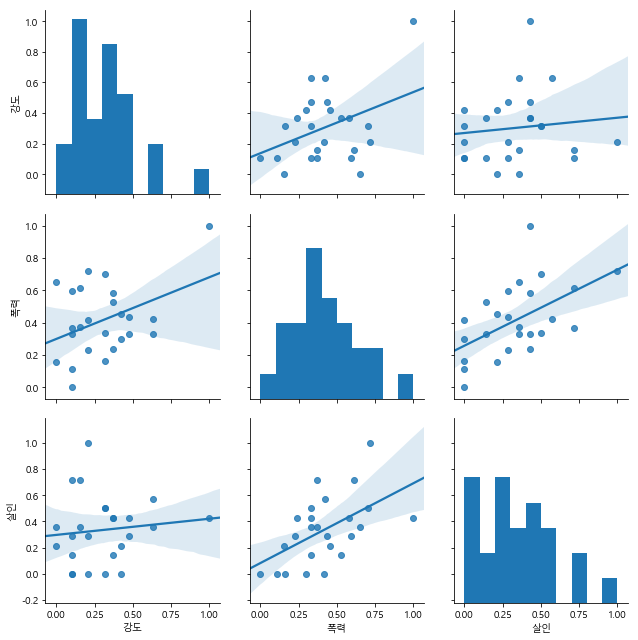

In [71]:
# 변수간의 상관성 => 산포 행렬
# 범죄들간의 연관성 
# kind='reg' 선형회귀
sns.pairplot( crime_anal_norm, 
              vars = ['강도','폭력','살인'], 
              size =3, 
              kind ='reg')
plt.show()

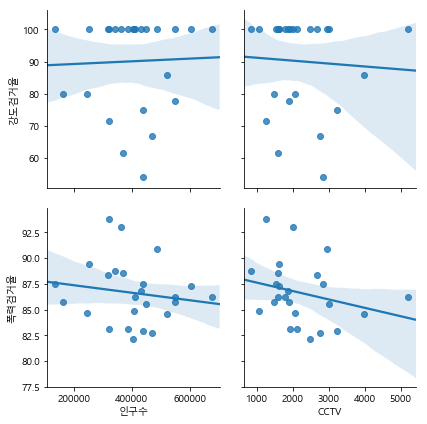

In [72]:
# X : 인구수, CCTV, Y: 강도검거율, 폭력검거율
sns.pairplot(crime_anal_norm, 
             x_vars=['인구수','CCTV'], 
             y_vars=['강도검거율','폭력검거율'],
             size=3, kind='reg')
plt.show()
# 인구수와 cctv 수는 검거율과 관련이 없다!!
# 원 cctv의 목적은 예방에 촛점이 맞춰져 있고\
# 검거 자체는 인구와 상관없는 요인들의 영향을 받는다.

In [73]:
# 검거 항목의 최대값(최고값) 100으로 한정하고, 그 기준을 값을 배치
# 정규화 => 값을 동일 범위내로 배치
crime_anal_norm['검거'] = crime_anal_norm['검거'] / crime_anal_norm['검거'].max() * 100

In [74]:
crime_anal_norm['검거']

자치구
강남구      90.658174
강동구      97.400425
강북구      88.308492
강서구      93.767633
관악구      88.262360
광진구      80.449525
구로구      79.956724
금천구      96.095302
노원구      87.732638
도봉구     100.000000
동대문구     96.794209
동작구      83.216010
마포구      89.949141
서대문구     94.849146
서초구      76.459876
성동구      92.247281
성북구      91.358285
송파구      91.374543
양천구      77.445992
영등포구     82.610569
용산구      87.894267
은평구      99.170251
종로구      76.014441
중구       64.122479
중랑구      92.751632
Name: 검거, dtype: float64

In [75]:
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head(2)

강간        강도        살인        절도        폭력       강간검거율  강도검거율  \
자치구                                                                        
도봉구  0.000000  0.105263  0.000000  0.000000  0.000000  100.000000  100.0   
은평구  0.250497  0.157895  0.357143  0.301962  0.369904   92.608696  100.0   

     살인검거율      절도검거율      폭력검거율     인구수  CCTV        범죄          검거  
자치구                                                                   
도봉구  100.0  65.876777  88.712242  341649   858  0.105263  100.000000  
은평구  100.0  67.339582  90.868794  487666  2962  1.437401   99.170251

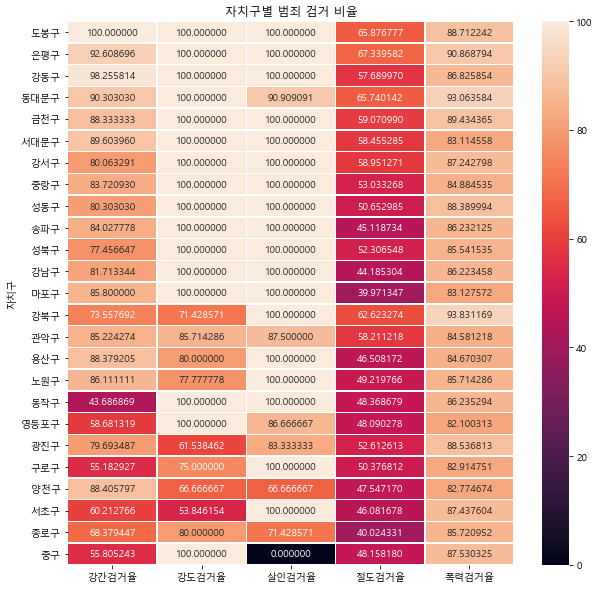

In [76]:
#히트맵을 통해서 검거율을 확인
# y: 자치구, x: xx검거율
# 데이터로 사용 crime_anal_norm_sort
plt.figure(figsize=(10, 10))
sns.heatmap(crime_anal_norm_sort[cols], annot=True, fmt='f',linewidths=5)
plt.title('자치구별 범죄 검거 비율')
plt.show()

In [77]:
# 범죄 발생 통계
# y:자치구(범죄비율이 높은수), x:5대 범죄
# 히트맵 표현

### 지도 시각화 (공간 시각화의 한범주)

- folium을 이용하고, geoJson 데이터를 이용하여 지도상에 행정구역을 표현
- 구역별 정보를 시각화 한다
- 연습 : 미국 지도에 실업율 데이터를 가지고 확인
- 적용 : 서울시 지도에 경찰서 표시, 검거율, 발생율에 따른 행정구역의 칼라맵적용, 마커를 통해 포인트 설정 및 폴리곤표현으로 검거율은 표시
- 응용 : 주유소정보데이터 부산시 행정구역으료 표현, 자치구별 가장 저렴한 주요소 마킹,행정구역별 주유가격 평균을 통해서 칼라맵으로 표시, 브랜드별(6개) 알뜰주유수 -> 브랜드대비, 진짜 싼지 체크!!

In [78]:
# 서울을 행정구역은 나눠서 드로잉 -> 자치구별로 드로잉
import json

In [79]:
# 한글 경우 인코딩 처리해서 지도에 데이터로 삽입
geo_str = json.load( open( '../data/seoul.json', encoding='utf-8' ) )

In [81]:
type(geo_str)

dict

In [87]:
gps = [37.5289126,126.9957077]

In [82]:
crime_anal_norm.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='자치구')

In [83]:
crime_anal_norm.columns

Index(['강간', '강도', '살인', '절도', '폭력', '강간검거율', '강도검거율', '살인검거율', '절도검거율',
       '폭력검거율', '인구수', 'CCTV', '범죄', '검거'],
      dtype='object')

### folium 
- 파이썬을 이용해 지도 시각화를 제공하는 라이브러리

<a href='http://localhost:8888/notebooks/Desktop/projects/analysis/pandas/basic/Folium_basic.ipynb'>기초학습</a>

In [85]:
import folium

In [92]:
map_seoul = folium.Map( location=gps, zoom_start=10)
# 행정구역을 표현
map_seoul.choropleth(geo_data=geo_str,
                     data=crime_anal_norm,
                     columns=[crime_anal_norm.index,'범죄'],
                     key_on='feature.id',
                     fill_color='YlGn',
                     legend_name='서울시 자치구별 범죄비율'
                      )
map_seoul

In [93]:
crime_anal_norm['범죄'].max()

4.428571428571429

In [95]:
# 범죄 값을 정규화하여 다시 시도
# 최대값은 5.0 기준 -> 재 정규화
# 범죄 발생율 = 범죄/5.0*100
# 컬러 PuRd
tmp = crime_anal_norm['범죄']/crime_anal_norm['범죄'].max() * 100
map_seoul = folium.Map( location=gps, zoom_start=10)

# 행정구역을 표현
map_seoul.choropleth( geo_data=geo_str
                   ,data=tmp 
                   ,columns=[ crime_anal_norm.index, tmp ]
                   ,key_on='feature.id'
                   ,fill_color='PuRd'
                   ,legend_name='서울시 자치구별 범죄비율'
                 )
map_seoul

In [96]:
# 인구수 대비 범죄응 계산하여 범죄 발생율 대입
# 범죄발생율 = 범죄(정규화된것)/인구수*100
# 컬러 PuRd
tmp = crime_anal_norm['범죄']/crime_anal_norm['인구수'] * 100
map_seoul = folium.Map( location=gps, zoom_start=10)

# 행정구역을 표현
map_seoul.choropleth( geo_data=geo_str
                   ,data=tmp 
                   ,columns=[ crime_anal_norm.index, tmp ]
                   ,key_on='feature.id'
                   ,fill_color='PuRd'
                   ,legend_name='서울시 자치구별 인구대비 범죄비율(5대범죄가중치동일)'
                 )
map_seoul

# 인구대비 범죄비율은 종로구가 1위를 차지
# 강남구는 그럼에도 불구하도 상위권 3위 이내에 존재한다

In [103]:
tmp_pop = np.sum(crime_anal[crime_anal.columns[:5]], axis=1)

In [104]:
tmp = tmp_pop/crime_anal_norm['인구수'] * 100
map_seoul = folium.Map( location=gps, zoom_start=10)
# 행정구역을 표현
map_seoul.choropleth( geo_data=geo_str
                   ,data=tmp 
                   ,columns=[ crime_anal_norm.index, tmp ]
                   ,key_on='feature.id'
                   ,fill_color='PuRd'
                   ,legend_name='서울시 자치구별 인구대비 범죄비율(5대범죄가중치동일)'
                 )
map_seoul
# 종로구가 실질적인 범죄 우발지역 자치구이다

C:\Users\User\Anaconda3\envs\analysis\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## 경찰서별 검거현황과 자치구별 범죄 발생현황을 표현
- 경찰서를 마킹
- 검거(순수카운트, 총량)를 서클마커 표시 => 작으면 적당히 스케일을 키운다
- 범죄(총량) 자치구별 색상표시

In [110]:
crime_data.head(2)
# 관할서
crime_data.index

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='구분')

In [113]:
crime_data['위도'], crime_data['경도']

(구분
 강남      37.5093899463715
 강동      37.5286763457485
 강북       37.637408362838
 강서      37.5397837301896
 관악      37.4745875338795
 광진      37.5428136101647
 구로      37.4948844667899
 금천     37.45725314643252
 남대문     37.5549786547527
 노원      37.6423345266253
 도봉      37.6533976253312
 동대문     37.5850804205685
 동작      37.5131469479959
 마포      37.5510118582052
 방배     37.48155944749938
 서대문     37.5649023404956
 서부     37.61273115700761
 서초      37.4956126696023
 성동      37.5617947420747
 성북      37.5897697305228
 송파      37.5019775317251
 수서      37.4934972653425
 양천      37.5165549067037
 영등포       37.52585220719
 용산      37.5411811395942
 은평      37.6285242467996
 종로      37.5755413947569
 종암       37.602095614954
 중랑      37.6182390801576
 중부      37.5636199296203
 혜화      37.5718915247338
 Name: 위도, dtype: object, 구분
 강남       127.067070541137
 강동       127.126894359114
 강북       127.027340967017
 강서       126.829985881518
 관악       126.951062346192
 광진       127.083842771963

In [105]:
# 5대 범죄에 대한 총량
tmp_pop = np.sum(crime_anal[crime_anal.columns[:5]], axis=1)

In [129]:
# 검거 컬럼만 뽑기
cols = list(filter(lambda x: x.find('검거')>0, crime_data.columns))

In [131]:
# 범죄의 총량을 구하는 부분
tmp_catch = np.sum(crime_data[cols], axis=1)
tmp_catch[:2]

구분
강남    3117
강동    3245
dtype: int64

In [132]:
# 서클의 크기가 너무 크면 애매 => 크기를 10으로 제한
tmp_catch = tmp_catch/tmp_catch.max()*10

In [135]:
map_seoul = folium.Map(location=gps, zoom_start=10)

# 행정구역을 표현
folium.Choropleth(geo_data=geo_str
                   ,name='choropleth'
                   ,data=tmp_pop 
                   ,columns=[crime_anal_norm.index, tmp_pop]
                   ,key_on='feature.id'
                   ,fill_color='PuRd'
                   ,legend_name='서울시 자치구별 인구대비 범죄비율(5대범죄가중치동일)'
                 ).add_to(map_seoul)

# 경찰서 마커 
for idx in range( len(crime_data.index) ):
    # 경찰서 위치 정보 -> 위도 경도의 정보를 담은 변수를 생성
    tmp_gps = [crime_data['위도'][idx],crime_data['경도'][idx]]
    # 마킹
    folium.Marker( tmp_gps, popup='서울%s경찰서' % crime_data.index[idx], 
                   icon=folium.Icon(icon='info-sign', color='red') ).add_to(map_seoul)
    folium.CircleMarker( tmp_gps, 
                         radius=tmp_catch[idx]*2, 
                         popup='%s서 검거량' % crime_data.index[idx], 
                         color='#3186cc', fill_color='#00ff00' ).add_to(map_seoul)
map_seoul